# Logistic Regression
### by Parth Agrawal Registration Number (240905088)

# Data Cleaning and Manipulation for Proper Training
All the Formula and data sets provided and a heatmap of the graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
tdata=pd.read_csv("Freyja_Pumpkins.csv")
data=pd.read_csv("Gotem Pumpkins.csv")
data

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,Çerçevelik
1996,1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,Ürgüp Sivrisi
1997,1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,Çerçevelik
1998,1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,Çerçevelik


/tmp/ipykernel_23872/498243563.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataplot = sb.heatmap(df.replace({"Çerçevelik": 1, "Ürgüp Sivrisi": 0}).infer_objects(copy=False).corr(), cmap="RdYlBu", annot=True)


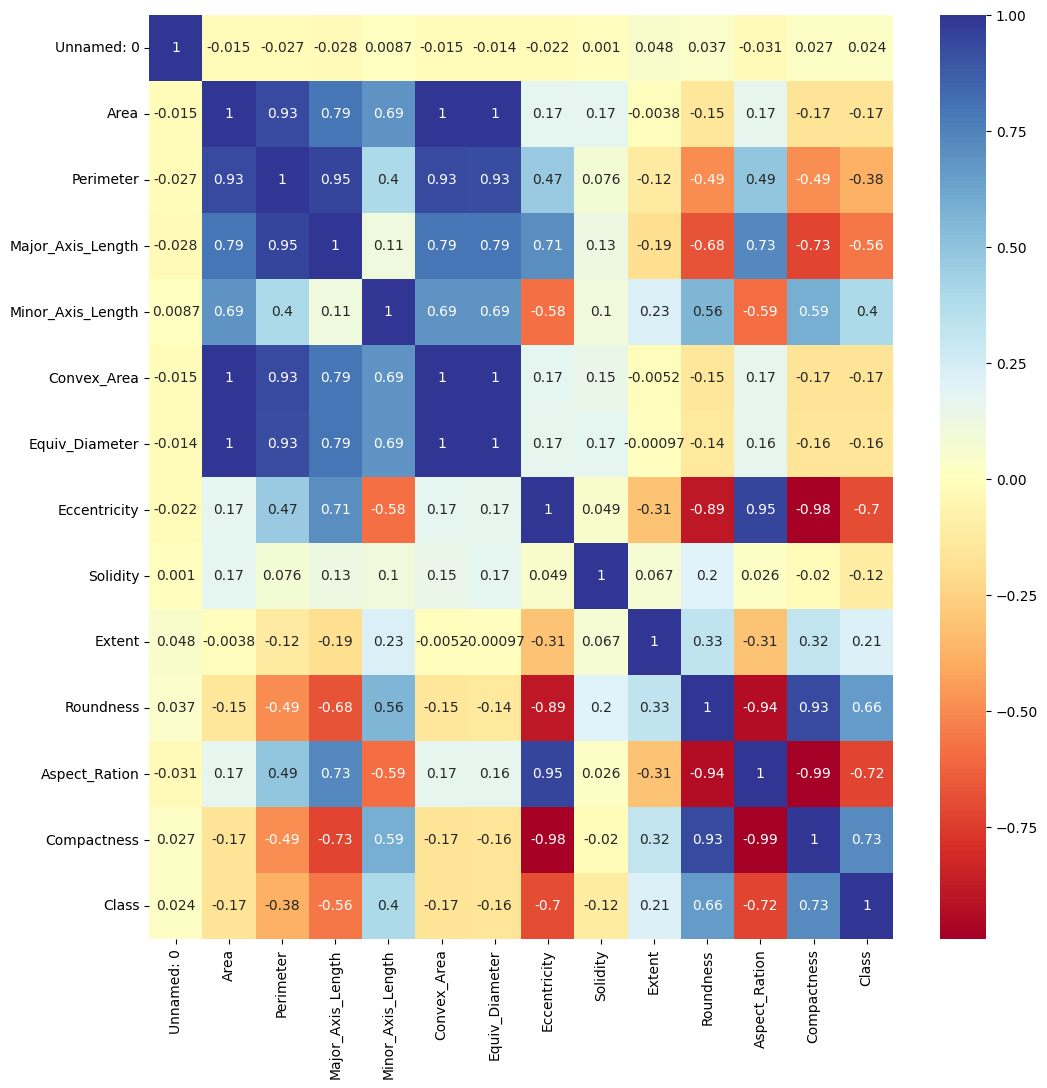

In [3]:
tdf=tdata.copy()
df=data.copy()
df.drop("Unnamed: 0",axis=1)
tdf.drop("Unnamed: 0",axis=1)
plt.figure(figsize=(12,12))
dataplot = sb.heatmap(df.replace({"Çerçevelik": 1, "Ürgüp Sivrisi": 0}).infer_objects(copy=False).corr(), cmap="RdYlBu", annot=True)

# Training the Model

In [4]:
def map_p(type):
    if type == "Çerçevelik":
        return 1
    else: return 0
deets = np.array([list(value) for value in df.drop("Class", axis=1).values]) 
classes = np.array([val for val in map(map_p, list(df['Class']))])

tdeets = np.array([list(value) for value in tdf.drop("Class", axis=1).values]) 
tclasses = np.array([val for val in map(map_p, list(tdf['Class']))])

In [5]:
# All Formulas
def logistic_fnc(z):
    g=1/(1+np.exp(-z))
    return g
def znormal(X):
    means = np.mean(X, axis=0)                                                                                               
    stdevs = np.std(X, axis=0)+0.00001
    X_norm = (X - means) / stdevs
    return (X_norm, means, stdevs)
def log_cost_fnc(X,y,w,b, lambdaval):
    m, n = X.shape
    cost = 0.
    for i in range(m):
        f_wb_xi = logistic_fnc(np.dot(X[i], w) + b)
        cost +=  -y[i]*np.log(f_wb_xi) - (1-y[i])*np.log(1-f_wb_xi)
    cost = cost/m
    #regularisation
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          
    reg_cost = (lambdaval/(2*m)) * reg_cost
    total_cost = cost + reg_cost                                       
    return total_cost
def cal_gradient(X, y, w, b,lambdaval):
    m,n=X.shape
    dw = np.zeros((n,))
    db = 0
    for i in range(m):
        f_wb_xi = logistic_fnc(np.dot(X[i],w) + b)
        err_i= f_wb_xi - y[i]
        for j in range(n):
            dw[j] += err_i * X[i,j]
        db += err_i
    dw=dw/m
    db=db/m
    for j in range(n):
        dw[j]+= (lambdaval/m) * w[j]
    return dw, db
def gradient_des(X, y, w_in, b_in, alpha, iters, lambdaval):
    cost_his=[]
    w=w_in.copy()
    b= b_in
    for i in range(iters):
        dw, db = cal_gradient(X,y,w,b,lambdaval)
        w -= alpha*dw
        b -= alpha*db
        cost_his.append(log_cost_fnc(X,y,w,b,lambdaval))
        if i % (iters/20) == 0 or i == iters-1:
            print(f"Iteration {i:4d}")
            print(f"Cost {cost_his[-1]}")
    return w, b, cost_his

Iteration    0
Cost 0.5191917649187686
Iteration 1250
Cost 0.3009050327710675
Iteration 2500
Cost 0.2973608550399107
Iteration 3750
Cost 0.2959369274021485
Iteration 5000
Cost 0.2950719338912203
Iteration 6250
Cost 0.29443988717317404
Iteration 7500
Cost 0.2939356114309445
Iteration 8750
Cost 0.2935125958495288
Iteration 10000
Cost 0.2931460905545262
Iteration 11250
Cost 0.29282158240667955
Iteration 12500
Cost 0.29253005465980303
Iteration 13750
Cost 0.29226562981982385
Iteration 15000
Cost 0.2920242738404756
Iteration 16250
Cost 0.291803054596095
Iteration 17500
Cost 0.2915997136376724
Iteration 18750
Cost 0.2914124194976981
Iteration 20000
Cost 0.291239625925527
Iteration 21250
Cost 0.2910799899595722
Iteration 22500
Cost 0.2909323236037904
Iteration 23750
Cost 0.29079556414717833
Iteration 24999
Cost 0.2906688524769754


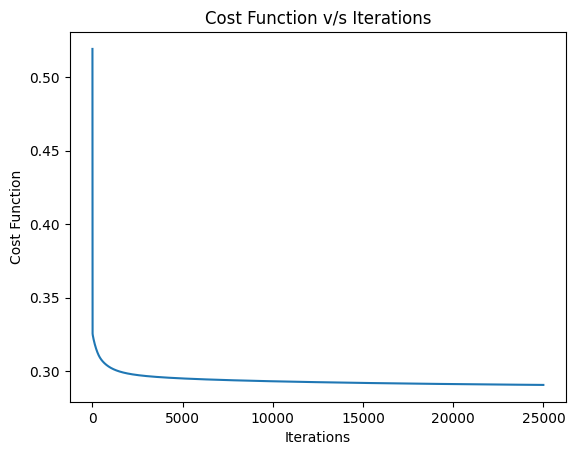

In [6]:
w_tmp  = np.zeros_like(deets[0])
b_tmp  = 0.
lambdaval = 0
alpha = 4
iters = 25000
w_out, b_out, cost_his = gradient_des(znormal(deets)[0], classes, w_tmp, b_tmp, alpha, iters, lambdaval)
ignore = 0
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title(f"Cost Function v/s Iterations")
plt.plot(range(ignore, iters), cost_his[ignore:])
plt.show()

# Predicting the Values from the Testing Dataset

In [7]:
predictions = logistic_fnc(np.dot(znormal(tdeets)[0], w_out) + b_out)

In [8]:
reordered = [1 if value >= 0.5 else 0 for value in predictions]
no_lessthan_error = 0
no_morethan_error = 0
perfect_1 = 0
perfect_0 =  0
for index, predicted in enumerate(reordered):
    actual = tclasses[index]
    if predicted > actual:
        no_morethan_error += 1
    elif actual > predicted:
        no_lessthan_error += 1
    elif actual == predicted:
        if actual == 0:
            perfect_0 += 1 
        else: 
            perfect_1 += 1

print(f"Your logistic regression model is {(perfect_0 + perfect_1)*100/len(reordered)}% accurate")

Your logistic regression model is 89.6% accurate


# Plotting the Logistic Function or Signoid Function

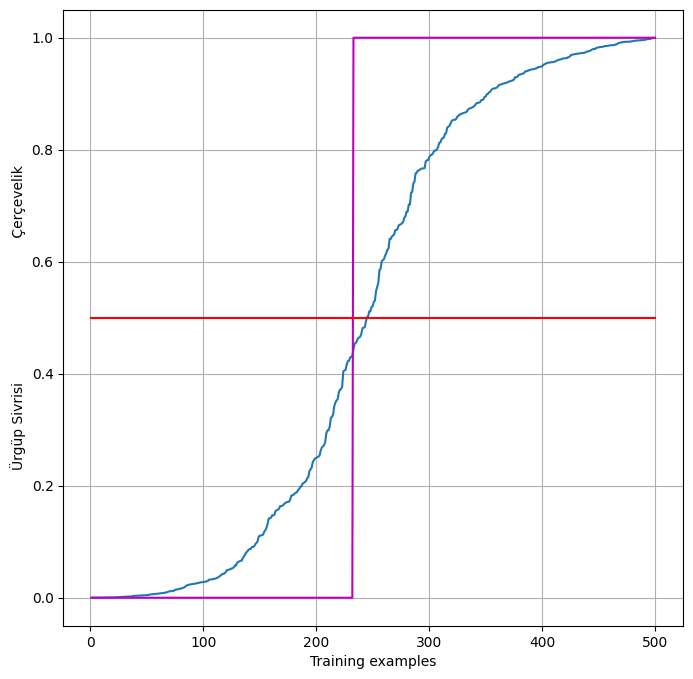

In [11]:
pltpredictions = predictions
pltpredictions.sort()
pltclasses = tclasses
pltclasses.sort()
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(range(1, len(pltpredictions) + 1), pltpredictions)
plt.plot(range(1, len(pltclasses)+1), pltclasses, c = 'm')
plt.plot(range(1, len(tclasses)+1), [0.5 for val in tclasses], c = 'r')
plt.ylabel("Ürgüp Sivrisi                                 Çerçevelik")
plt.xlabel("Training examples")
plt.grid()
plt.show()

# Conclusion
This Logistic Regression Model is 89.6% Accurate